In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [14]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.1.0_full_model_vicious_cyle_diarrhea_remission/ciff_sam/2022_03_08_00_15_24/count_data/'

In [12]:
os.listdir(output_dir)

['branches.yaml',
 'requirements.txt',
 'count_data',
 'logs',
 '__pycache__',
 'settings.py',
 'output.hdf',
 'model_specification.yaml',
 'keyspace.yaml']

In [3]:
scenarios = ['sam_treatment','mam_treatment','sqlns',
                'lbwsg_interventions','zinc_supplementation']
scenario_names = ['SAM treatment',
                 'MAM treatment',
                 'SQ-LNS',
                 'LBWSG interventions',
                 'Zinc supplementation']
scenario_colors = [#'tab:blue',
                  'tab:orange',
                  'tab:green',
                  'tab:red',
                  'tab:purple',
                  'tab:brown']

ages = ['6-11_months','12_to_23_months','2_to_4']

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# wasting treatment

In [5]:
# start with wasting treatment

wasting_transition_count = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transition_count.head()

,sex,year,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [6]:
mam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                            'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']))
              &(wasting_transition_count.mam_treatment=='covered')]
          .groupby(['input_draw','scenario']).sum()[['value']].reset_index())
mam_tx['intervention'] = 'mam_treatment'
mam_tx

,input_draw,scenario,value,intervention
0,29,baseline,19140.0,mam_treatment
1,29,lbwsg_interventions,46856.0,mam_treatment
2,29,mam_treatment,53260.0,mam_treatment
3,29,sam_treatment,18825.0,mam_treatment
4,29,sqlns,46859.0,mam_treatment
...,...,...,...,...
61,946,lbwsg_interventions,46335.0,mam_treatment
62,946,mam_treatment,51534.0,mam_treatment
63,946,sam_treatment,15824.0,mam_treatment
64,946,sqlns,46327.0,mam_treatment


In [7]:
sam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count')
              &(wasting_transition_count.sam_treatment=='covered')]
          .groupby(['input_draw','scenario']).sum()[['value']].reset_index())
sam_tx['intervention'] = 'sam_treatment'
sam_tx

,input_draw,scenario,value,intervention
0,29,baseline,13768.0,sam_treatment
1,29,lbwsg_interventions,14258.0,sam_treatment
2,29,mam_treatment,15430.0,sam_treatment
3,29,sam_treatment,16389.0,sam_treatment
4,29,sqlns,14277.0,sam_treatment
...,...,...,...,...
61,946,lbwsg_interventions,14309.0,sam_treatment
62,946,mam_treatment,15323.0,sam_treatment
63,946,sam_treatment,16394.0,sam_treatment
64,946,sqlns,14335.0,sam_treatment


# sqlns

In [8]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [9]:
pt.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [10]:
sqlns = (pt.loc[(pt.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4']))
               &(pt.sq_lns=='covered')]
         .groupby(['input_draw','scenario']).sum())[['value']].reset_index()
sqlns['intervention'] = 'sqlns'
sqlns

,input_draw,scenario,value,intervention
0,29,baseline,0.000000,sqlns
1,29,lbwsg_interventions,211592.787132,sqlns
2,29,mam_treatment,0.000000,sqlns
3,29,sam_treatment,0.000000,sqlns
4,29,sqlns,211542.536619,sqlns
...,...,...,...,...
61,946,lbwsg_interventions,211359.338809,sqlns
62,946,mam_treatment,0.000000,sqlns
63,946,sam_treatment,0.000000,sqlns
64,946,sqlns,211294.057495,sqlns


# lbwsg

In [11]:
births = pd.read_csv(output_dir + 'births.csv')
births.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,bep,cat2
2,2,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,mmn,cat2
3,3,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,mmn,cat2
4,4,female,2022,birth_weight_sum,29,baseline,4.489095e+06,covered,ifa,cat2


In [12]:
births.measure.unique()

array(['birth_weight_sum', 'low_weight_births', 'total_births'],
      dtype=object)

In [13]:
supplementation = (births.loc[(births.measure=='total_births')]
                   .groupby(['input_draw','scenario','maternal_supplementation']).sum()
                   [['value']]
                   .reset_index()
                   .rename(columns={'maternal_supplementation':'intervention'}))
supplementation = supplementation.loc[supplementation.intervention!='uncovered']
supplementation

,input_draw,scenario,intervention,value
0,29,baseline,bep,0.0
1,29,baseline,ifa,64725.0
2,29,baseline,mmn,0.0
4,29,lbwsg_interventions,bep,11061.0
5,29,lbwsg_interventions,ifa,25814.0
...,...,...,...,...
257,946,sqlns,ifa,63189.0
258,946,sqlns,mmn,0.0
260,946,zinc_supplementation,bep,11307.0
261,946,zinc_supplementation,ifa,24853.0


In [14]:
itns = (births.loc[(births.measure=='total_births')
                              &(births.insecticide_treated_nets=='covered')]
                   .groupby(['input_draw','scenario']).sum()
                   [['value']]
                   .reset_index())
itns['intervention'] = 'itns'
itns

,input_draw,scenario,value,intervention
0,29,baseline,30381.0,itns
1,29,lbwsg_interventions,44389.0,itns
2,29,mam_treatment,30381.0,itns
3,29,sam_treatment,30381.0,itns
4,29,sqlns,30381.0,itns
...,...,...,...,...
61,946,lbwsg_interventions,43619.0,itns
62,946,mam_treatment,27847.0,itns
63,946,sam_treatment,27847.0,itns
64,946,sqlns,27847.0,itns


# zinc

In [15]:
# to do when we get the outputs

In [16]:
ther_zinc = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
ther_zinc = ther_zinc.loc[ther_zinc.age.isin(ages)]
ther_zinc = ther_zinc.loc[(ther_zinc.therapeutic_zinc=='covered')
                         &(ther_zinc.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')]
ther_zinc = ther_zinc.groupby(['input_draw','scenario']).sum()[['value']].reset_index()
ther_zinc['intervention'] = 'therapeutic_zinc'
ther_zinc

,input_draw,scenario,value,intervention
0,29,baseline,163323.0,therapeutic_zinc
1,29,lbwsg_interventions,160720.0,therapeutic_zinc
2,29,mam_treatment,163339.0,therapeutic_zinc
3,29,sam_treatment,163323.0,therapeutic_zinc
4,29,sqlns,160774.0,therapeutic_zinc
...,...,...,...,...
61,946,lbwsg_interventions,291257.0,therapeutic_zinc
62,946,mam_treatment,296434.0,therapeutic_zinc
63,946,sam_treatment,296433.0,therapeutic_zinc
64,946,sqlns,291346.0,therapeutic_zinc


In [17]:
prev_zinc = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
prev_zinc = prev_zinc.loc[prev_zinc.age.isin(ages)]
prev_zinc = prev_zinc.loc[(prev_zinc.preventative_zinc=='covered')]
prev_zinc = prev_zinc.groupby(['input_draw','scenario']).sum()[['value']].reset_index()
prev_zinc['intervention'] = 'preventative_zinc'
prev_zinc

,input_draw,scenario,value,intervention
0,29,baseline,0.00000,preventative_zinc
1,29,lbwsg_interventions,0.00000,preventative_zinc
2,29,mam_treatment,0.00000,preventative_zinc
3,29,sam_treatment,0.00000,preventative_zinc
4,29,sqlns,0.00000,preventative_zinc
...,...,...,...,...
61,946,lbwsg_interventions,0.00000,preventative_zinc
62,946,mam_treatment,0.00000,preventative_zinc
63,946,sam_treatment,0.00000,preventative_zinc
64,946,sqlns,0.00000,preventative_zinc


# all interventions


This dataframe gives us the total ANNUAL number of services provided for each intervention in each simulated scenario, by draw. This should be compared with simulation outcomes in count space to calculate ICERs (or converted to rate space to calculate costs per population size). 

Note:

- SQ-LNS and prevenative zinc are measures of person-time rather than counts... it is equivalent to the count of yearly provisions
- For maternal supplementation and insecticide treated nets, we consider coverage only among live births. However, this will be an underestimate of total population coverage of these interventions given that some mothers covered by the interventions will result in stillbirths. We should consider either: a) noting this in our limitations, or b) incorporating this into our cost model using the stillbirth to live birth ratio covariate
    - Also, we do not consider the delay in coverage to account for gestation

In [18]:
data = pd.concat([sam_tx,
                 mam_tx,
                 sqlns,
                 supplementation,
                 itns,
                 prev_zinc,
                 ther_zinc])
data

,input_draw,scenario,value,intervention
0,29,baseline,13768.0,sam_treatment
1,29,lbwsg_interventions,14258.0,sam_treatment
2,29,mam_treatment,15430.0,sam_treatment
3,29,sam_treatment,16389.0,sam_treatment
4,29,sqlns,14277.0,sam_treatment
...,...,...,...,...
61,946,lbwsg_interventions,291257.0,therapeutic_zinc
62,946,mam_treatment,296434.0,therapeutic_zinc
63,946,sam_treatment,296433.0,therapeutic_zinc
64,946,sqlns,291346.0,therapeutic_zinc


# import costs

In [19]:
costs = pd.read_csv('ciff_costs.csv').rename(columns={'intervention_name':'intervention'})
costs.head()

,intervention,cost_per_service
0,sam_treatment,57.60
1,mam_treatment,16.32
2,sqlns,23.25
3,ifa,0.91
4,mms,2.98


In [20]:
sim_costs = data.merge(costs, on=['intervention'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
(sim_costs.groupby(['input_draw','scenario','intervention']).sum()).groupby(['intervention','scenario']).mean()/1_000_000

value  cost_per_service  total_cost
intervention      scenario                                                    
bep               baseline              0.000000      3.224000e-05    0.000000
                  lbwsg_interventions   0.011019      3.224000e-05    0.355255
                  mam_treatment         0.000000      3.224000e-05    0.000000
                  sam_treatment         0.000000      3.224000e-05    0.000000
                  sqlns                 0.000000      3.224000e-05    0.000000
                  zinc_supplementation  0.011019      3.224000e-05    0.355255
ifa               baseline              0.064848      9.100000e-07    0.059012
                  lbwsg_interventions   0.025862      9.100000e-07    0.023534
                  mam_treatment         0.064848      9.100000e-07    0.059012
                  sam_treatment         0.064848      9.100000e-07    0.059012
                  sqlns                 0.064848      9.100000e-07    0.059012
                  zinc_supplementation  0.025862      9.100000e-07    0.023534
itns              baseline              0.028915      4.450000e-06    0.128674
                  lbwsg_interventions   0.043927      4.450000e-06    0.195476
                  mam_treatment         0.028915      4.450000e-06    0.128674
                  sam_treatment         0.028915      4.450000e-06    0.128674
                  sqlns                 0.028915      4.450000e-06    0.128674
                  zinc_supplementation  0.043927      4.450000e-06    0.195476
mam_treatment     baseline              0.017054      1.632000e-05    0.278314
                  lbwsg_interventions   0.045936      1.632000e-05    0.749683
                  mam_treatment         0.050944      1.632000e-05    0.831406
                  sam_treatment         0.016784      1.632000e-05    0.273916
                  sqlns                 0.045941      1.632000e-05    0.749762
                  zinc_supplementation  0.043228      1.632000e-05    0.705484
preventative_zinc baseline              0.000000      2.610000e-06    0.000000
                  lbwsg_interventions   0.000000      2.610000e-06    0.000000
                  mam_treatment         0.000000      2.610000e-06    0.000000
                  sam_treatment         0.000000      2.610000e-06    0.000000
                  sqlns                 0.000000      2.610000e-06    0.000000
                  zinc_supplementation  0.211036      2.610000e-06    0.550804
sam_treatment     baseline              0.012169      5.760000e-05    0.700961
                  lbwsg_interventions   0.013248      5.760000e-05    0.763059
                  mam_treatment         0.014154      5.760000e-05    0.815265
                  sam_treatment         0.015075      5.760000e-05    0.868320
                  sqlns                 0.013266      5.760000e-05    0.764106
                  zinc_supplementation  0.012726      5.760000e-05    0.733033
sqlns             baseline              0.000000      2.325000e-05    0.000000
                  lbwsg_interventions   0.211047      2.325000e-05    4.906845
                  mam_treatment         0.000000      2.325000e-05    0.000000
                  sam_treatment         0.000000      2.325000e-05    0.000000
                  sqlns                 0.210987      2.325000e-05    4.905455
                  zinc_supplementation  0.211105      2.325000e-05    4.908194
therapeutic_zinc  baseline              0.383675      1.900000e-07    0.072898
                  lbwsg_interventions   0.379268      1.900000e-07    0.072061
                  mam_treatment         0.383699      1.900000e-07    0.072903
                  sam_treatment         0.383687      1.900000e-07    0.072900
                  sqlns                 0.379368      1.900000e-07    0.072080
                  zinc_supplementation  0.501582      1.900000e-07    0.095301

In [21]:
sim_costs = data.merge(costs, on=['intervention'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
sim_costs = sim_costs.groupby(['input_draw','scenario']).sum()[['total_cost']].rename(columns={'total_cost':'value'})
sim_costs

value
input_draw scenario                          
29         baseline              1.330528e+06
           lbwsg_interventions   7.113648e+06
           mam_treatment         1.983101e+06
           sam_treatment         1.476357e+06
           sqlns                 6.730100e+06
...                                       ...
946        lbwsg_interventions   7.131088e+06
           mam_treatment         1.961383e+06
           sam_treatment         1.440285e+06
           sqlns                 6.731116e+06
           zinc_supplementation  7.639560e+06

[66 rows x 1 columns]

In [22]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt = pt.groupby(['input_draw','scenario']).sum()[['value']]
pt.head()

value
input_draw scenario                          
29         baseline             518309.067762
           lbwsg_interventions  518463.448323
           mam_treatment        518345.895962
           sam_treatment        518317.310062
           sqlns                518373.946612

In [23]:
sim_cost_rate = sim_costs / pt * 100_000
sim_cost_rate 

value
input_draw scenario                          
29         baseline              2.567056e+05
           lbwsg_interventions   1.372064e+06
           mam_treatment         3.825825e+05
           sam_treatment         2.848365e+05
           sqlns                 1.298310e+06
...                                       ...
946        lbwsg_interventions   1.373768e+06
           mam_treatment         3.779587e+05
           sam_treatment         2.775456e+05
           sqlns                 1.297031e+06
           zinc_supplementation  1.471503e+06

[66 rows x 1 columns]

In [24]:
sim_cost_rate.groupby('scenario').describe(percentiles=[0.025,0.975])/1_000_000
# costs in millions for each scenario

value                                          \
                         count      mean       std       min      2.5%   
scenario                                                                 
baseline              0.000011  0.239524  0.029499  0.181395  0.186085   
lbwsg_interventions   0.000011  1.364417  0.023061  1.327418  1.329278   
mam_treatment         0.000011  0.368396  0.025031  0.326928  0.329401   
sam_treatment         0.000011  0.270973  0.024216  0.233760  0.234195   
sqlns                 0.000011  1.289986  0.023245  1.251903  1.254156   
zinc_supplementation  0.000011  1.460981  0.022183  1.426572  1.427774   

                                                    
                           50%     97.5%       max  
scenario                                            
baseline              0.246285  0.275448  0.279615  
lbwsg_interventions   1.372064  1.400132  1.406453  
mam_treatment         0.377959  0.405257  0.410553  
sam_treatment         0.277546  0.306521  0.312843  
sqlns                 1.297031  1.326839  1.333682  
zinc_supplementation  1.470489  1.492112  1.494861

In [25]:
incremental_cost = (sim_cost_rate - 
                     (sim_cost_rate.reset_index().loc[sim_cost_rate.reset_index().scenario=='baseline'])
                     .set_index('input_draw')[['value']])
incremental_cost

value
input_draw scenario                          
29         baseline              0.000000e+00
           lbwsg_interventions   1.115358e+06
           mam_treatment         1.258770e+05
           sam_treatment         2.813096e+04
           sqlns                 1.041604e+06
...                                       ...
946        lbwsg_interventions   1.135140e+06
           mam_treatment         1.393305e+05
           sam_treatment         3.891741e+04
           sqlns                 1.058403e+06
           zinc_supplementation  1.232875e+06

[66 rows x 1 columns]

In [26]:
cols = ['input_draw','scenario']

ylds = pd.read_csv(output_dir + 'ylds.csv').groupby(cols).sum()[['value']]
ylls = pd.read_csv(output_dir + 'ylls.csv').groupby(cols).sum()[['value']]
dalys = (ylds + ylls) / pt * 100_000
dalys_baseline = dalys.reset_index().loc[dalys.reset_index().scenario=='baseline'].set_index(['input_draw'])[['value']]
dalys_averted = dalys_baseline - dalys
dalys_averted.head()

value
input_draw scenario                        
29         baseline                0.000000
           lbwsg_interventions  2315.116632
           mam_treatment         549.841864
           sam_treatment         169.669965
           sqlns                1185.129253

In [27]:
cols = ['input_draw','scenario']

wt = pd.read_csv(output_dir + 'wasting_transition_count.csv')#.groupby(cols).sum()[['value']]
sam_cases = (wt.loc[wt.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']
             .groupby(cols).sum()[['value']])
sam_cases_baseline = sam_cases.reset_index().loc[sam_cases.reset_index().scenario=='baseline'].set_index('input_draw').drop(columns='scenario')
sam_cases_averted = (sam_cases_baseline - sam_cases)/pt*100_000
sam_cases_pct_reduction = (sam_cases_baseline - sam_cases)/sam_cases_baseline*100
sam_cases_averted

value
input_draw scenario                        
29         baseline                0.000000
           lbwsg_interventions   674.493064
           mam_treatment         343.785880
           sam_treatment          64.439291
           sqlns                 670.944214
...                                     ...
946        lbwsg_interventions   706.236345
           mam_treatment         411.607340
           sam_treatment          95.580095
           sqlns                 699.278498
           zinc_supplementation  859.646315

[66 rows x 1 columns]

In [28]:
cols = ['input_draw','scenario']

wpt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')#.groupby(cols).sum()[['value']]
wpt = wpt.loc[wpt.age.isin(['6-11_months','12_to_23_months','2_to_4'])]
sam_prev = ((wpt.loc[wpt.cause=='severe_acute_malnutrition']
             .groupby(cols).sum()[['value']])
            / wpt.groupby(cols).sum()[['value']])
sam_prev_baseline = sam_prev.reset_index().loc[sam_prev.reset_index().scenario=='baseline'].set_index('input_draw').drop(columns='scenario')
sam_prev_averted = (sam_prev_baseline - sam_prev)/pt*100_000
sam_prev_pct_reduction = (sam_prev_baseline - sam_prev)/sam_prev_baseline*100
sam_prev_pct_reduction

value
input_draw scenario                       
29         baseline               0.000000
           lbwsg_interventions   15.718812
           mam_treatment         11.321003
           sam_treatment          7.680823
           sqlns                 15.617330
...                                    ...
946        lbwsg_interventions   15.659846
           mam_treatment         11.817720
           sam_treatment          7.903387
           sqlns                 15.392077
           zinc_supplementation  17.570428

[66 rows x 1 columns]

In [29]:
def calculate_sam_cases_averted(sam_cases_averted_scenario, relative_scenario):
    sam_cases_rel = (sam_cases.reset_index().loc[sam_cases.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw'])[['value']])
    sam_cases_averted_rel = (sam_cases_rel - sam_cases).reset_index()
    sam_cases_averted_rel = sam_cases_averted_rel.loc[sam_cases_averted_rel.scenario==sam_cases_averted_scenario]
    return sam_cases_averted_rel

def calculate_cascading_sam_cases_averted():
    data = calculate_sam_cases_averted('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_sam_cases_averted(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [30]:
def calculate_incremental_cost(incremental_cost_scenario, relative_scenario):
    sim_cost_rel = (sim_cost_rate.reset_index().loc[sim_cost_rate.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw'])[['value']])
    incremental_cost = (sim_cost_rate - sim_cost_rel).reset_index()
    incremental_cost = incremental_cost.loc[incremental_cost.scenario==incremental_cost_scenario]
    return incremental_cost

def calculate_cascading_incremental_costs():
    data = calculate_incremental_cost('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_incremental_cost(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [31]:
def calculate_dalys_averted(dalys_averted_scenario, relative_scenario):
    dalys_rel = (dalys.reset_index().loc[dalys.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw'])[['value']])
    dalys_averted_rel = (dalys_rel - dalys).reset_index()
    dalys_averted_rel = dalys_averted_rel.loc[dalys_averted_rel.scenario==dalys_averted_scenario]
    return dalys_averted_rel

def calculate_cascading_dalys_averted():
    data = calculate_dalys_averted('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_dalys_averted(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [32]:
cascading_incremental_costs = calculate_cascading_incremental_costs()
cascading_incremental_costs.head()

,input_draw,scenario,value,relative_scenario
3,29,sam_treatment,28130.961233,baseline
9,232,sam_treatment,30692.345416,baseline
15,357,sam_treatment,23604.781295,baseline
21,394,sam_treatment,22235.243208,baseline
27,524,sam_treatment,26463.996550,baseline


In [33]:
cascading_dalys_averted = calculate_cascading_dalys_averted()
cascading_dalys_averted.head()

,input_draw,scenario,value,relative_scenario
3,29,sam_treatment,169.669965,baseline
9,232,sam_treatment,203.713822,baseline
15,357,sam_treatment,275.764591,baseline
21,394,sam_treatment,183.787951,baseline
27,524,sam_treatment,304.017534,baseline


In [34]:
cascading_sam_cases_averted = calculate_cascading_sam_cases_averted()
cascading_sam_cases_averted.head()

,input_draw,scenario,value,relative_scenario
3,29,sam_treatment,334.0,baseline
9,232,sam_treatment,273.0,baseline
15,357,sam_treatment,100.0,baseline
21,394,sam_treatment,264.0,baseline
27,524,sam_treatment,228.0,baseline


In [35]:
cascading_icers = (cascading_incremental_costs.set_index(['input_draw','scenario','relative_scenario'])
                   /cascading_dalys_averted.set_index(['input_draw','scenario','relative_scenario']))
cascading_icers.head()                   

,,,value
input_draw,scenario,relative_scenario,
29,sam_treatment,baseline,165.798120
232,sam_treatment,baseline,150.664030
357,sam_treatment,baseline,85.597579
394,sam_treatment,baseline,120.983139
524,sam_treatment,baseline,87.047599


In [36]:
cascading_icers_sam_cases = (cascading_incremental_costs.set_index(['input_draw','scenario','relative_scenario'])
                   /cascading_sam_cases_averted.set_index(['input_draw','scenario','relative_scenario']))
cascading_icers_sam_cases.head()                   

,,,value
input_draw,scenario,relative_scenario,
29,sam_treatment,baseline,84.224435
232,sam_treatment,baseline,112.426174
357,sam_treatment,baseline,236.047813
394,sam_treatment,baseline,84.224406
524,sam_treatment,baseline,116.070160


# ICERs

In [37]:
icers = (incremental_cost / dalys_averted).reset_index()
icers.head()

,input_draw,scenario,value
0,29,baseline,NaN
1,29,lbwsg_interventions,481.771859
2,29,mam_treatment,228.933038
3,29,sam_treatment,165.798120
4,29,sqlns,878.895151


In [38]:
icers_sam = (incremental_cost / sam_cases_averted).reset_index()
icers_sam.head()

,input_draw,scenario,value
0,29,baseline,NaN
1,29,lbwsg_interventions,1653.624186
2,29,mam_treatment,366.149327
3,29,sam_treatment,436.549825
4,29,sqlns,1552.445543


In [39]:
def plot_measure_averted_and_incremental_costs(measure_data, measure_label, measure_title):
    plt.figure(dpi=200)
    plot = (measure_data.rename(columns={'value':'measure_averted'})
               .merge(incremental_cost.rename(columns={'value':'incremental_cost'}), 
                      right_index=True, left_index=True)).reset_index()
    for i in list(range(0,len(scenarios))):
        p = plot.loc[plot.scenario==scenarios[i]]
        plt.scatter(p.measure_averted, p.incremental_cost/1_000_000, s=7, label=scenario_names[i],
                   color=scenario_colors[i])
        plt.grid()
    plt.legend(bbox_to_anchor=[1,1])
    plt.xlabel(f'{measure_label} per 100,000 PY')
    plt.ylabel('Incremental cost relative to baseline\nin millions of USD per 100,000 PY')
    plt.xlim(0,# - 0.05*plot['measure_averted'].max(),
             plot['measure_averted'].max()*1.1)
    plt.title(f'{measure_title} and incremental\ncosts relative to baseline per 100,000 person-years')

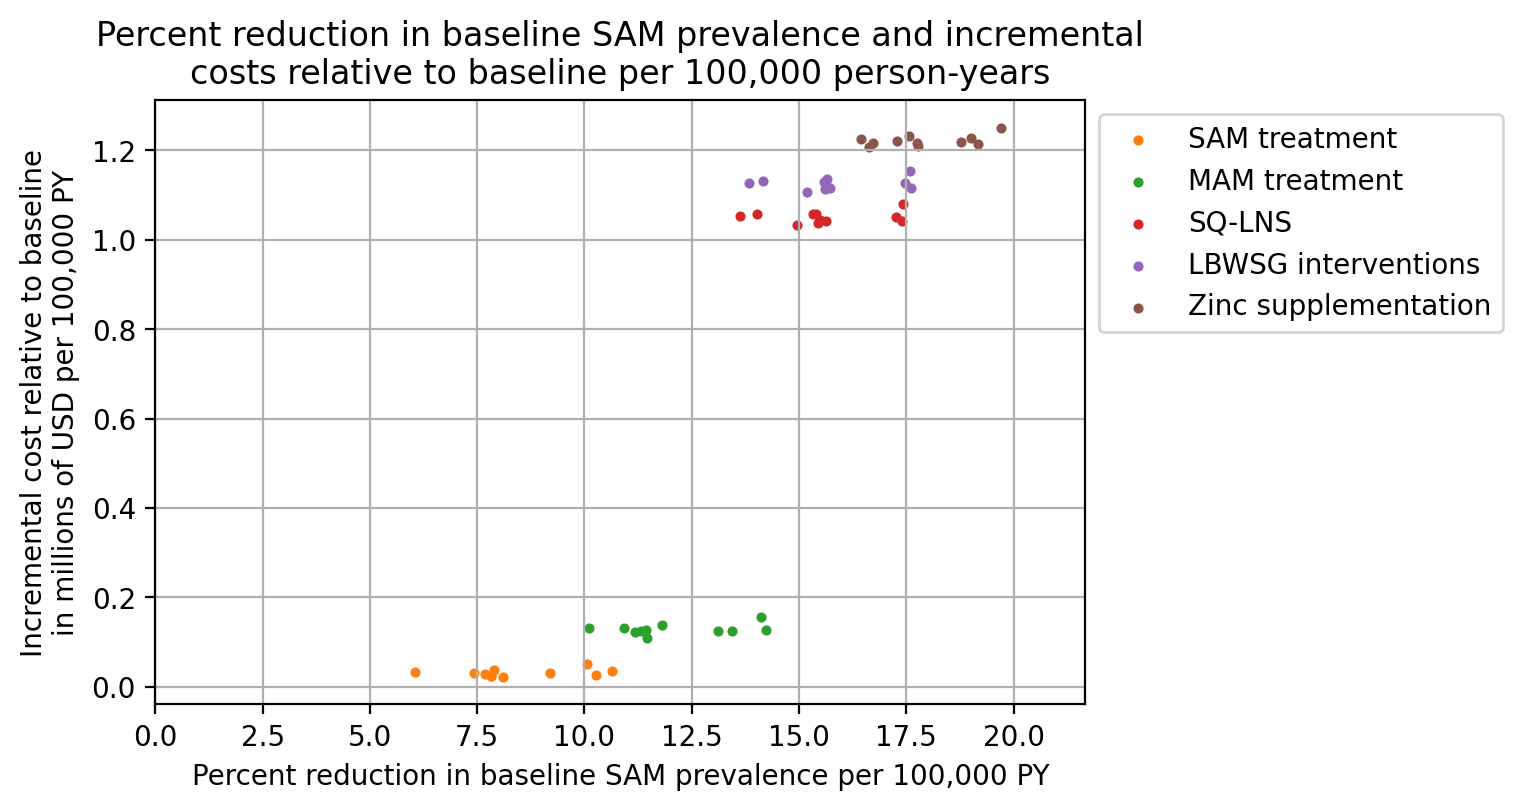

In [40]:
#plot_measure_averted_and_incremental_costs(dalys_averted, 'DALYs averted relative to baseline', 'Disability adjusted life years averted')
#plot_measure_averted_and_incremental_costs(sam_cases_averted, 'SAM cases averted relative to baseline', 'SAM cases averted')
plot_measure_averted_and_incremental_costs(sam_prev_pct_reduction, 'Percent reduction in baseline SAM prevalence', 
                                           'Percent reduction in baseline SAM prevalence')
#plot_measure_averted_and_incremental_costs(sam_cases_pct_reduction, 'Percent reduction in baseline incident SAM cases', 
#                                           'Percent reduction in baseline incident SAM cases')

In [41]:
def plot_icers(dataframe, label, title, ylim):
    plt.figure(dpi=120)
    p = dataframe.groupby('scenario').describe()[['value']].reset_index()
    p['order'] = np.where(p.scenario=='sam_treatment',0,
                         np.where(p.scenario=='mam_treatment',1,
                                 np.where(p.scenario=='sqlns',2,
                                         np.where(p.scenario=='lbwsg_interventions',3,
                                                 np.where(p.scenario=='zinc_supplementation',4,np.nan)))))
    p = p.sort_values(by='order')
    plt.bar(p.scenario, p['value','mean'], yerr=p['value','std'])
    plt.ylim(0,ylim)
    plt.xticks(scenarios, [s + '\nscenario' for s in scenario_names],rotation=60)
    plt.grid()
    plt.ylabel(label)
    plt.title(title)

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


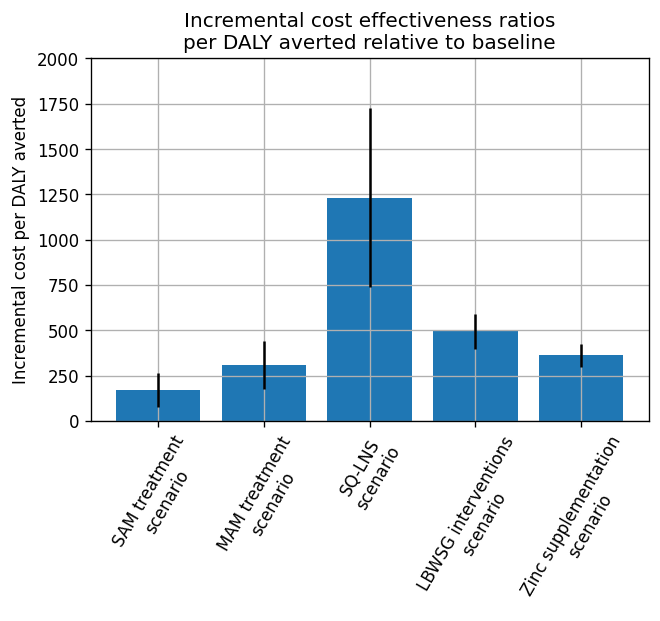

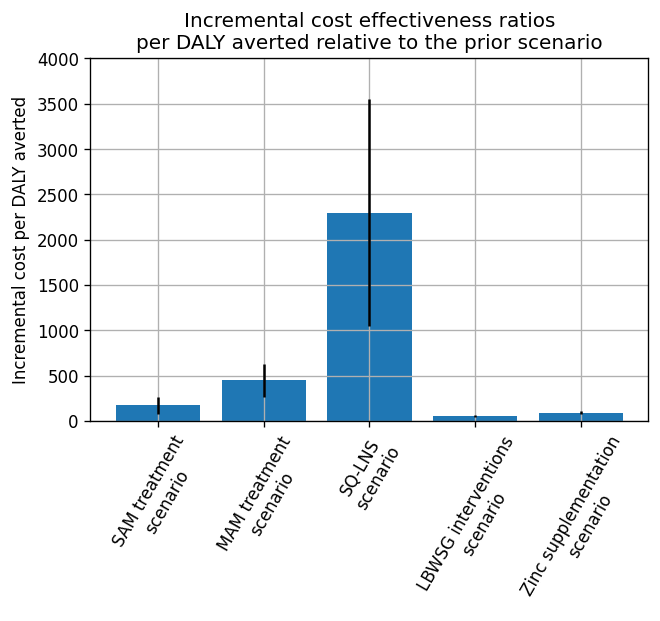

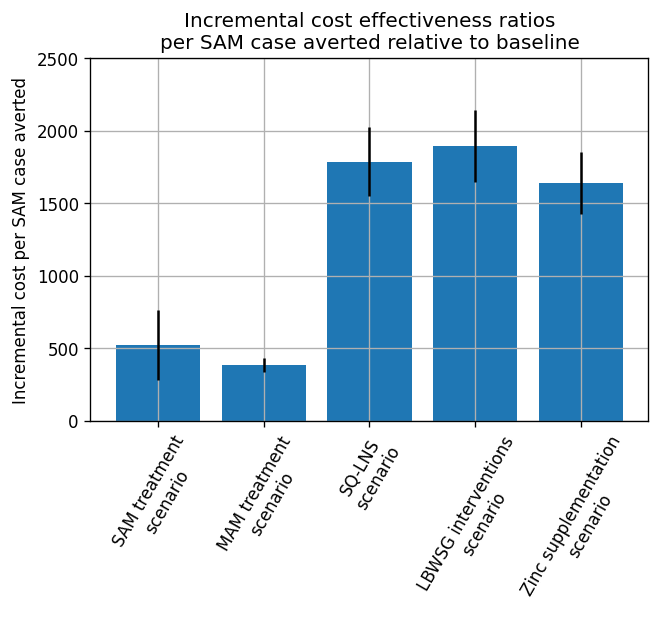

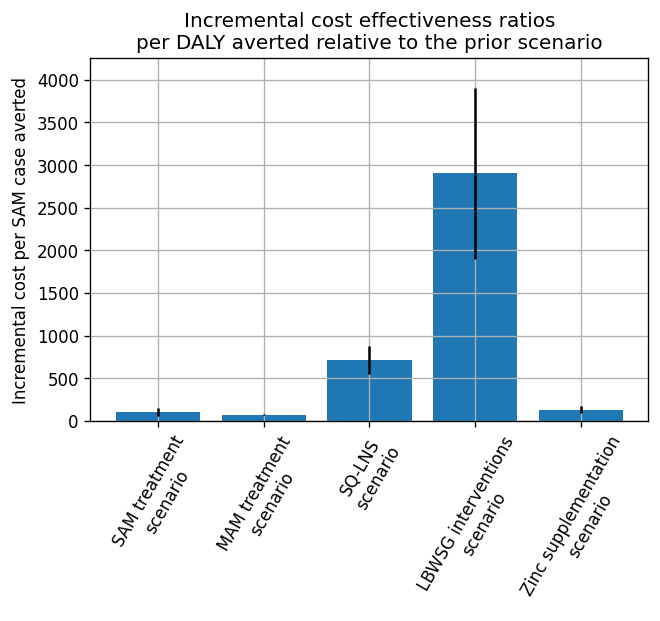

In [42]:
plot_icers(icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to baseline',2000)
plot_icers(cascading_icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to the prior scenario',4000)
plot_icers(icers_sam, 'Incremental cost per SAM case averted',
           'Incremental cost effectiveness ratios\nper SAM case averted relative to baseline', 2500)
plot_icers(cascading_icers_sam_cases, 'Incremental cost per SAM case averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to the prior scenario',4250)

# AARR

In [43]:
ages = ['6-11_months','12_to_23_months','2_to_4']
sam_prev = (wpt.loc[(wpt.age.isin(ages))
                  &(wpt.cause=='severe_acute_malnutrition')].groupby(['input_draw','scenario','year']).sum()
            /wpt.loc[(wpt.age.isin(ages))].groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
mam_prev = (wpt.loc[(wpt.age.isin(ages))
                  &(wpt.cause=='moderate_acute_malnutrition')].groupby(['input_draw','scenario','year']).sum()
            /wpt.loc[(wpt.age.isin(ages))].groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
gam_prev = (wpt.loc[(wpt.age.isin(ages))
                  &(wpt.cause.isin(['severe_acute_malnutrition',
                                    'moderate_acute_malnutrition']))].groupby(['input_draw','scenario','year']).sum()
            /wpt.loc[(wpt.age.isin(ages))].groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
sam_prev

,input_draw,scenario,year,value
0,29,baseline,2022,0.017544
1,29,baseline,2023,0.017992
2,29,baseline,2024,0.017759
3,29,baseline,2025,0.017969
4,29,baseline,2026,0.017427
...,...,...,...,...
325,946,zinc_supplementation,2022,0.018949
326,946,zinc_supplementation,2023,0.018036
327,946,zinc_supplementation,2024,0.015443
328,946,zinc_supplementation,2025,0.012771


In [44]:
import statsmodels.formula.api as smf

In [45]:
sam_aarr = pd.DataFrame()
for scenario in sam_prev.scenario.unique():
    for input_draw in sam_prev.input_draw.unique():
        regression = smf.ols('np.log(value) ~ year', data=sam_prev.loc[(sam_prev.scenario==scenario)
                                                                      &(sam_prev.input_draw==input_draw)]).fit()
        temp = pd.DataFrame()
        temp['scenario'] = [scenario]
        temp['input_draw'] = [input_draw]
        temp['aarr'] = [1-np.exp(regression.params['year'])]
        sam_aarr = pd.concat([sam_aarr, temp])
        sam_aarr = pd.concat([sam_aarr, temp])

In [46]:
mam_aarr = pd.DataFrame()
for scenario in sam_prev.scenario.unique():
    for input_draw in sam_prev.input_draw.unique():
        regression = smf.ols('np.log(value) ~ year', data=mam_prev.loc[(mam_prev.scenario==scenario)
                                                                      &(mam_prev.input_draw==input_draw)]).fit()
        temp = pd.DataFrame()
        temp['scenario'] = [scenario]
        temp['input_draw'] = [input_draw]
        temp['aarr'] = [1-np.exp(regression.params['year'])]
        mam_aarr = pd.concat([mam_aarr, temp])
        mam_aarr = pd.concat([mam_aarr, temp])

In [47]:
gam_aarr = pd.DataFrame()
for scenario in sam_prev.scenario.unique():
    for input_draw in sam_prev.input_draw.unique():
        regression = smf.ols('np.log(value) ~ year', data=gam_prev.loc[(gam_prev.scenario==scenario)
                                                                      &(gam_prev.input_draw==input_draw)]).fit()
        temp = pd.DataFrame()
        temp['scenario'] = [scenario]
        temp['input_draw'] = [input_draw]
        temp['aarr'] = [1-np.exp(regression.params['year'])]
        gam_aarr = pd.concat([gam_aarr, temp])
        gam_aarr = pd.concat([gam_aarr, temp])

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(0.0, 14.0)

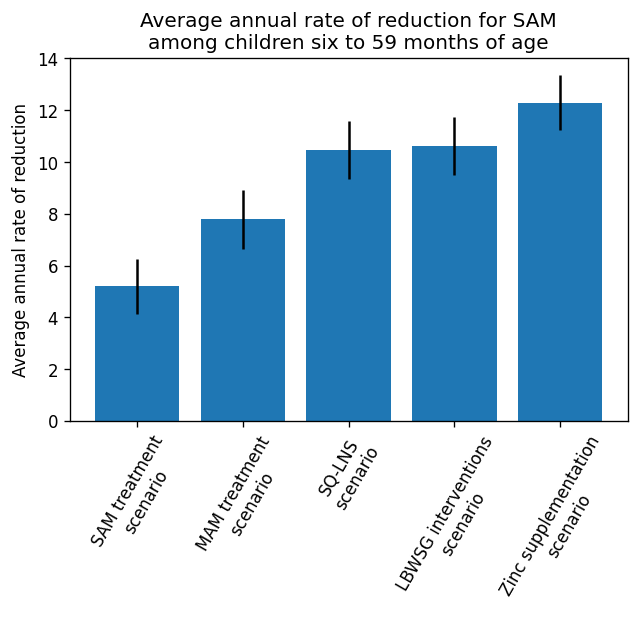

In [48]:
plt.figure(dpi=120)
sam_aarr_p = sam_aarr.groupby('scenario').describe().reset_index().drop(columns='input_draw')
sam_aarr_p['aarr'] = sam_aarr_p.aarr * 100
sam_aarr_p['order'] = np.where(sam_aarr_p.scenario=='sam_treatment',0,
                         np.where(sam_aarr_p.scenario=='mam_treatment',1,
                                 np.where(sam_aarr_p.scenario=='sqlns',2,
                                        np.where(sam_aarr_p.scenario=='lbwsg_interventions',3,
                                                 np.where(sam_aarr_p.scenario=='zinc_supplementation',4,10)))))
sam_aarr_p = sam_aarr_p.sort_values(by='order').loc[sam_aarr_p.scenario!='baseline']
plt.bar(sam_aarr_p.scenario, sam_aarr_p['aarr','mean'], yerr=sam_aarr_p['aarr','std'])
plt.xticks(sam_aarr_p.scenario,[s + '\nscenario' for s in scenario_names], rotation=60)
plt.title('Average annual rate of reduction for SAM\namong children six to 59 months of age')
plt.ylabel('Average annual rate of reduction')
plt.ylim([0,14])

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(0.0, 14.0)

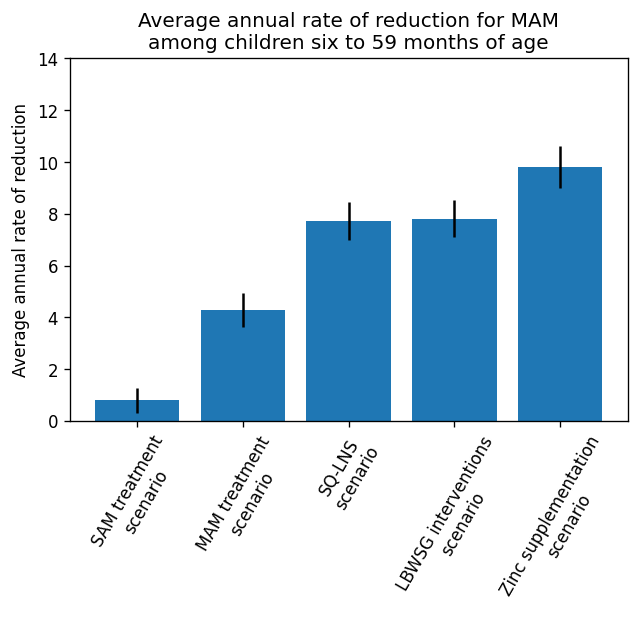

In [49]:
plt.figure(dpi=120)
mam_aarr_p = mam_aarr.groupby('scenario').describe().reset_index().drop(columns='input_draw')
mam_aarr_p['aarr'] = mam_aarr_p.aarr * 100
mam_aarr_p['order'] = np.where(mam_aarr_p.scenario=='sam_treatment',0,
                         np.where(mam_aarr_p.scenario=='mam_treatment',1,
                                 np.where(mam_aarr_p.scenario=='sqlns',2,
                                        np.where(mam_aarr_p.scenario=='lbwsg_interventions',3,
                                                 np.where(mam_aarr_p.scenario=='zinc_supplementation',4,10)))))
mam_aarr_p = mam_aarr_p.sort_values(by='order').loc[mam_aarr_p.scenario!='baseline']
plt.bar(mam_aarr_p.scenario, mam_aarr_p['aarr','mean'], yerr=mam_aarr_p['aarr','std'])
plt.xticks(mam_aarr_p.scenario,[s + '\nscenario' for s in scenario_names], rotation=60)
plt.title('Average annual rate of reduction for MAM\namong children six to 59 months of age')
plt.ylabel('Average annual rate of reduction')
plt.ylim([0,14])

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(0.0, 14.0)

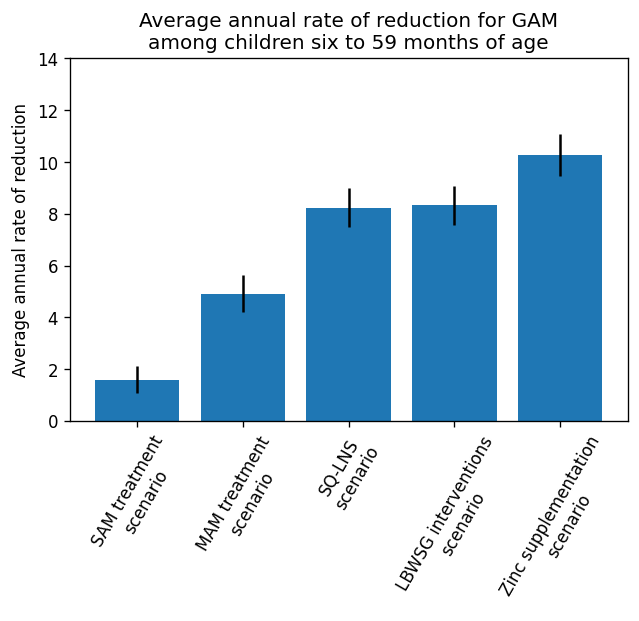

In [50]:
plt.figure(dpi=120)
gam_aarr_p = gam_aarr.groupby('scenario').describe().reset_index().drop(columns='input_draw')
gam_aarr_p['aarr'] = gam_aarr_p.aarr * 100
gam_aarr_p['order'] = np.where(gam_aarr_p.scenario=='sam_treatment',0,
                         np.where(gam_aarr_p.scenario=='mam_treatment',1,
                                 np.where(gam_aarr_p.scenario=='sqlns',2,
                                        np.where(gam_aarr_p.scenario=='lbwsg_interventions',3,
                                                 np.where(gam_aarr_p.scenario=='zinc_supplementation',4,10)))))
gam_aarr_p = gam_aarr_p.sort_values(by='order').loc[gam_aarr_p.scenario!='baseline']
plt.bar(gam_aarr_p.scenario, gam_aarr_p['aarr','mean'], yerr=gam_aarr_p['aarr','std'])
plt.xticks(gam_aarr_p.scenario,[s + '\nscenario' for s in scenario_names], rotation=60)
plt.title('Average annual rate of reduction for GAM\namong children six to 59 months of age')
plt.ylabel('Average annual rate of reduction')
plt.ylim([0,14])